ENTER THE CITY NAME:   bangalore
______________________________________________________________________

Weather Statistics for - BANGALORE  || 21 Jun 2021 | 10:52:01 AM
______________________________________________________________________

Current temperature          : 27.11 deg C
Current weather description  : scattered clouds
Current Humidity level       : 60 %
Current wind speed           : 7.2 kmph


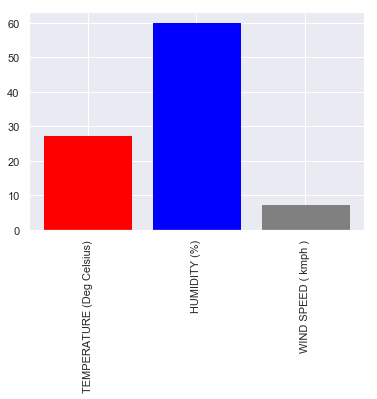

In [5]:
  
import requests
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
user_api = os.environ['weatherX'] # capturing value of windows environment variable
location = input("ENTER THE CITY NAME:   ")
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}>>this API ID is used, generated by me.
complete_api_link = "https://api.openweathermap.org/data/2.5/weather?q="+location+"&appid="+user_api
api_link = requests.get(complete_api_link)
api_data = api_link.json() # json format of representation

if api_data['cod']=='404':
	print("INVALID CITY: {},Please check city name again".format(location))
else:
    # capturing data from json and converting it into a readable format
    tempC = ((api_data['main']['temp']) - 273.15)
    weatherdes = api_data['weather'][0]['description']
    humid = api_data['main']['humidity']
    wind = api_data['wind']['speed']
    date_time = datetime.now().strftime("%d %b %Y | %I:%M:%S %p")
values=[tempC,humid,wind]
parameters=["TEMPERATURE (Deg Celsius)"," HUMIDITY (%)","WIND SPEED ( kmph )"]
plt.xticks(rotation='vertical')
sns.set()
bars=plt.bar(parameters,values)
bars[0].set_color('red')
bars[1].set_color('blue')
bars[2].set_color('grey')

print ("______________________________________________________________________\n")
print ("Weather Statistics for - {}  || {}".format(location.upper(), date_time))
print ("______________________________________________________________________\n")
print ("Current temperature          : {:.2f} deg C".format(tempC))
print ("Current weather description  :",weatherdes)
print ("Current Humidity level       :",humid, '%')
print ("Current wind speed           :",wind ,'kmph')
plt.show()